In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from swarmANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Swarm<H1>

<H1>Przygotowanie zbioru danych: XOR<H1>

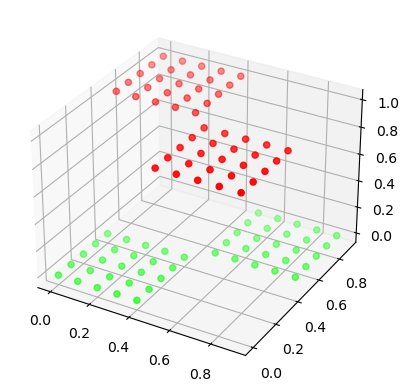

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

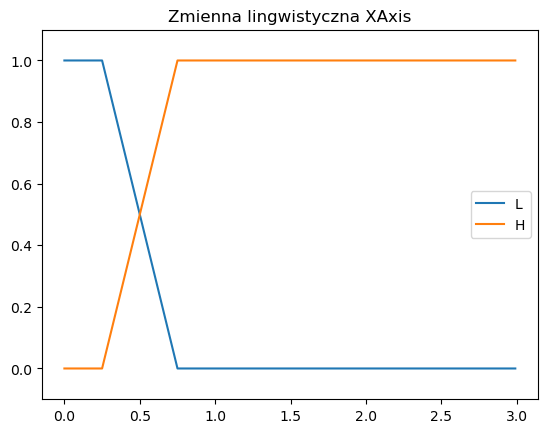

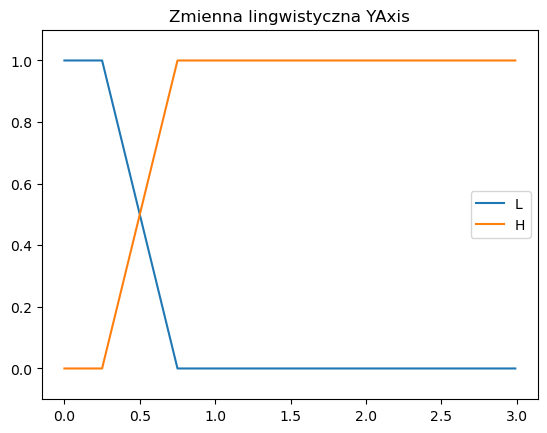

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.04049987 0.55517347 0.0774102 ]
 [0.57331692 0.91541505 0.53723828]
 [0.11550215 0.39338337 0.92229358]
 [0.64211398 0.30621086 0.5175488 ]]


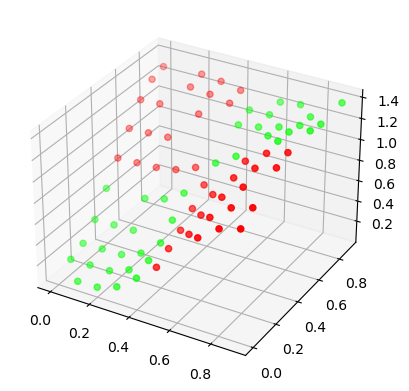

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

 23%|██▎       | 2251/10000 [03:34<12:22, 10.44it/s]E:\!SIiUM2\MSI\swarmEngine.py:53: RuntimeWarning: overflow encountered in multiply
  self.velocities = self.weight * self.velocities + self.c1 * r1 * (self.best_positions - self.positions) + \
100%|██████████| 10000/10000 [15:56<00:00, 10.46it/s]

Optymalizacja zakończona!
z blędem:   1.5765166949677223e-14
Liczba it:  10000
TIME elapsed:  956.2655730247498


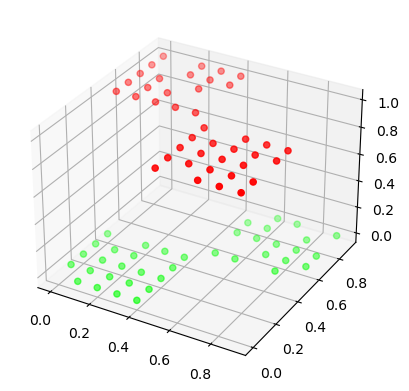

In [6]:
start = time.time()
fis.train(True, True, False, True, n_iter=10000, n_units=500, exploration_iters=500)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

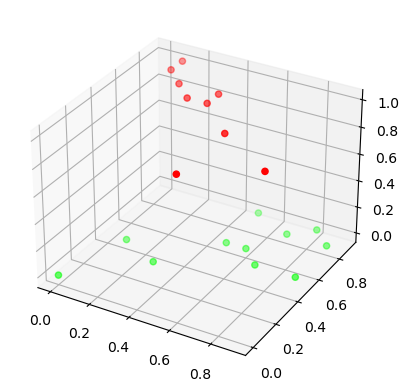

In [7]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

In [8]:
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry początkowe:
Przesłanki:  [[0.44221671 0.03210776]
 [0.49873477 0.00108631]] 
Konkluzje:  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.84345499e-53 1.50243934e-53 1.00000000e+00]
 [2.64984166e-51 6.62838093e-15 1.00000000e+00]
 [0.00000000e+00 3.83305889e-53 0.00000000e+00]]


<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

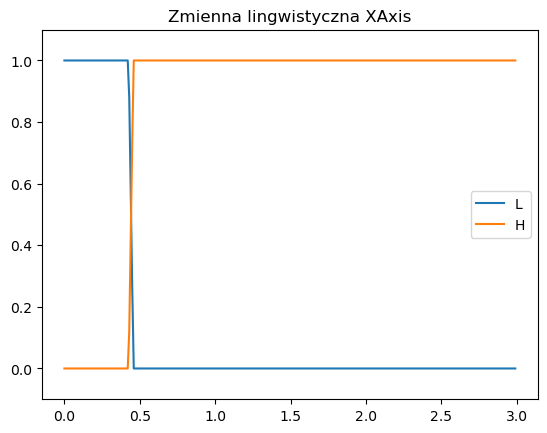

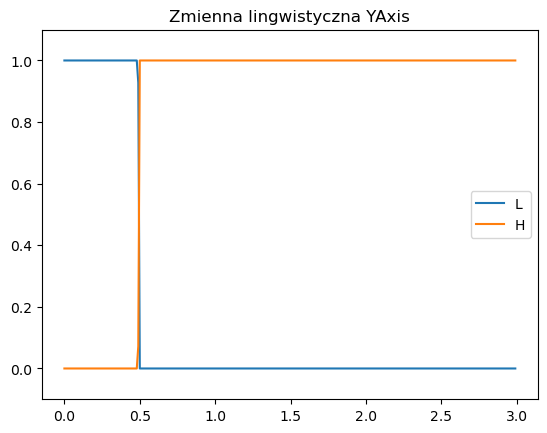

In [9]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [10]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.44221671, 0.03210776],
       [0.49873477, 0.00108631]]) 
Konkluzje:  array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.84345499e-53, 1.50243934e-53, 1.00000000e+00],
       [2.64984166e-51, 6.62838093e-15, 1.00000000e+00],
       [0.00000000e+00, 3.83305889e-53, 0.00000000e+00]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

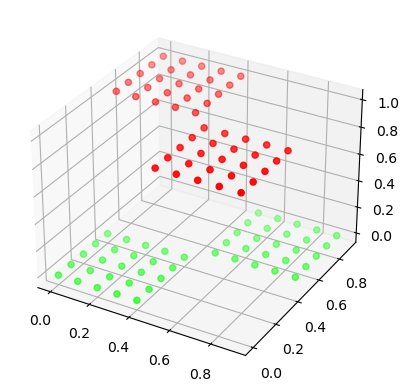

In [11]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

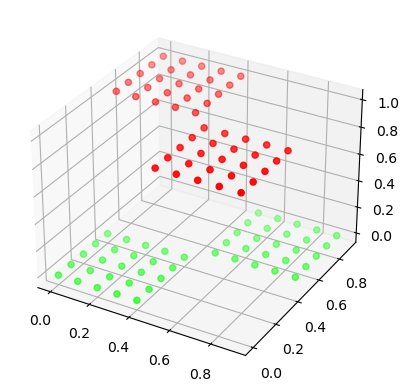

In [12]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

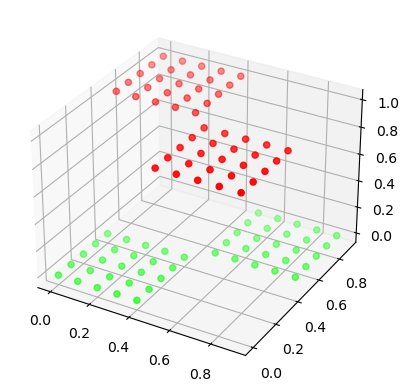

In [13]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [14]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000001B3075564C0>


In [15]:
%matplotlib inline

In [20]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=1000, n_units=500, exploration_iters=250)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()
    print("Parametry koncowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

100%|██████████| 1000/1000 [02:04<00:00,  8.05it/s]


Optymalizacja zakończona!
z blędem:   22.53148467938893
Liczba it:  1000
TIME elapsed:  124.34049987792969


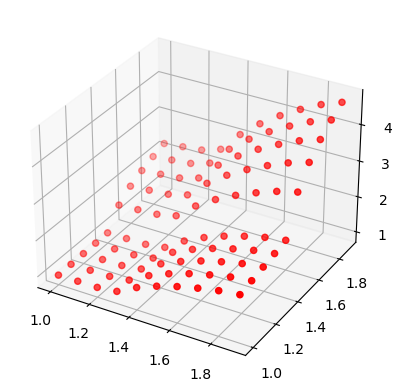

Parametry koncowe:
Przesłanki:  [[[1.79860106 0.98854149 1.90529145 0.48337578]
  [2.19107273 0.63196788 0.5938107  2.08813974]]

 [[2.18920052 0.51628899 0.93223729 2.40228746]
  [2.89294129 1.70740994 0.63919477 1.21083174]]] 
Konkluzje:  [[0.02906883 0.06512202 0.87394657]
 [0.         1.29445878 1.74569795]
 [1.26003516 1.00653492 0.48872139]
 [1.99498281 1.99986283 1.99630541]]


100%|██████████| 1000/1000 [02:45<00:00,  6.06it/s]


Optymalizacja zakończona!
z blędem:   182.95803858020366
Liczba it:  1000
TIME elapsed:  165.28494429588318


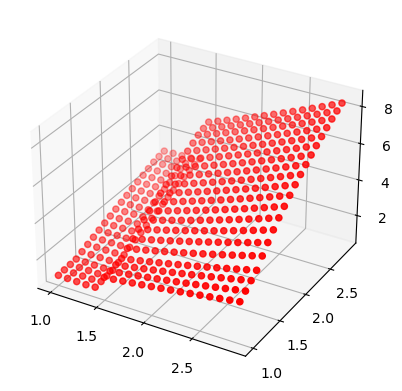

Parametry koncowe:
Przesłanki:  [[[1.19877196e+00 6.02456073e-01 2.94218254e+00 6.52766510e-13]
  [3.94129723e+00 6.51694516e-06 2.64584578e+00 5.56021904e-01]
  [1.82619860e-01 8.57869703e-01 3.69770801e+00 2.84709656e+00]]

 [[2.81041972e-01 1.97796760e+00 2.06505080e-02 3.23650652e+00]
  [3.99315218e+00 2.55733733e+00 1.41448511e+00 3.71916482e+00]
  [3.20294680e+00 2.21085631e-01 2.26774267e+00 3.44070437e+00]]] 
Konkluzje:  [[1.86976318e-04 3.76312761e-01 1.55753813e-01]
 [1.24477441e-01 1.73502158e+00 6.17404215e-01]
 [1.63088164e-03 2.79517199e-01 1.28477029e+00]
 [1.59088331e-01 1.00624566e+00 5.59004556e-02]
 [1.48750737e+00 8.16062731e-01 1.92327462e+00]
 [1.78051012e+00 1.82879889e+00 5.89744644e-01]
 [9.47545770e-05 3.72739084e-04 8.39694073e-03]
 [1.86920546e+00 1.73436893e+00 3.81519116e-01]
 [4.65819923e-01 6.97369555e-01 4.65826198e-01]]


100%|██████████| 1000/1000 [04:01<00:00,  4.14it/s]

Optymalizacja zakończona!
z blędem:   415.7035500348537
Liczba it:  1000
TIME elapsed:  241.94085907936096


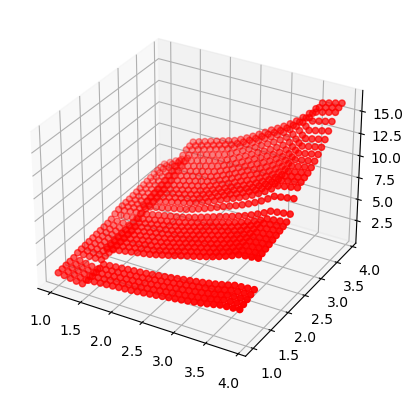

Parametry koncowe:
Przesłanki:  [[[1.77917280e+00 8.81705709e-01 7.93943556e-01 1.37997874e+00]
  [9.65333694e-01 9.64026291e-01 2.04123904e+00 5.23355996e-02]
  [3.96520416e+00 2.33040977e+00 2.15622902e+00 3.92642204e+00]
  [1.39456091e-07 1.38386917e+00 2.06826910e-01 6.77406513e-01]]

 [[3.85492171e-01 2.22744869e+00 3.99974862e+00 7.53997567e-11]
  [3.74616838e+00 2.25543115e+00 2.39964086e-01 1.31162617e+00]
  [2.51694674e+00 8.44429634e-01 1.84861379e+00 7.34528223e-01]
  [5.03681590e-01 4.51793036e-01 1.17141711e+00 1.04314702e-01]]] 
Konkluzje:  [[1.18894788e-01 2.64673269e-06 7.81156463e-01]
 [1.86303578e-01 5.00395766e-07 1.90395019e-06]
 [4.99767525e-01 7.42888239e-02 4.35755358e-01]
 [1.88368804e+00 1.91095085e+00 6.83047396e-05]
 [2.80050680e-01 9.74215903e-01 1.19495812e+00]
 [6.04458096e-01 1.60001187e-04 1.78431666e+00]
 [1.76601459e+00 1.86895623e+00 2.00000000e+00]
 [3.08583188e-01 1.75896387e-03 1.86254933e+00]
 [6.89608357e-01 5.30858042e-01 6.41401935e-01]
 [5.106

  6%|▋         | 64/1000 [00:36<08:47,  1.78it/s]


KeyboardInterrupt: 

In [21]:
times = [train_multiplication_table(n) for n in range(2, 6)]

In [ ]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [18]:
times

[206.86496663093567, 325.3410358428955, 482.6529219150543, 1311.5015008449554]

In [19]:
errors

[20.660050549414365, 202.39454897138822, 534.4531713932786, 1350.245292344006]